
# ASSIGNED flow between plates



The flow of an incompressible fluid between two solid plates and driven by a pressure drop is given by:

$\frac{d^2 v}{dy^2} = \frac{\Delta P}{\mu L}$

where v(y) is the velocity in the flow direction (x) as a function of position between the plates. The fluid is glycerol with a viscosity $\mu = 0.9$ Pa-s., the gap between the plates is 0.5 mm and the pressure drop $\frac{\Delta P}{L}$ is 200 MPa / m.  Calculate the velocity profile using solve\_bvp for the situation that (a) both plates are stationary and (b) for the situation that the upper plate is stationary and the bottom plate is moving at 10 m/s in the opposite direction as the pressure drop; plot these together on the same plot.




## solution



Let

$v1 = v$

$v1' = v'$

$v2 = v1'$
$v2' = v''$

$v1' = v2$
$v2' = \frac{\Delta P}{\mu L}$

We have to define boundary conditions:

Case a)
$v1(0) = 0$

$v1(L) = 0$

case b)
$v1(0) = -10$

$v1(L) = 0$



The algorithm converged to the desired accuracy.
The algorithm converged to the desired accuracy.


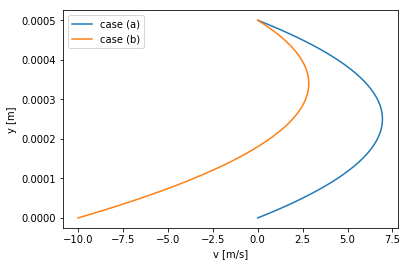

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

mu = 0.9    # Pa*s
L = 0.5e-3  # m
dPdL = -200e6  # Pa/m

def bvp(x, V):
    v1, v2 = V
    dv1dx = v2
    dv2dx = np.ones(x.shape) * dPdL / mu
    return dv1dx, dv2dx

def bc1(Va, Vb):
    v1a, v2a = Va
    v1b, v2b = Vb
    return [v1a, v1b] # both zero

def bc2(Va, Vb):
    v1a, v2a = Va
    v1b, v2b = Vb
    return [v1a + 10, # Bottom plate moving at -10 m/s
            v1b]

X = np.linspace(0, L)

p = np.polyfit([0, L/2, L], [0, 6, 0], 2)
v1 = np.polyval(p, X)
v2 = np.gradient(v1, X)

V_guess = [v1, v2]

sol1 = solve_bvp(bvp, bc1, X, V_guess)
print(sol1.message)

sol2 = solve_bvp(bvp, bc2, X, V_guess)
print(sol2.message)
plt.plot(sol1.y[0], sol1.x, label='case (a)')
plt.plot(sol2.y[0], sol2.x, label='case (b)')
plt.xlabel('v [m/s]')
plt.ylabel('y [m]')
plt.legend()

## General comments

The sign of $\frac{\Delta P}{L}$ is to be negative for pressure drop. If the sign is positive, that is pressure rise.